# Extra Resources
- Principal components analysis. Herve Abdi and Lynne J.Williams;
- What is principal component analysis? Markus Ringnér;
- Algorthms for manifold learning. Lawrence Cayton;
- Larg-Scale Manifold Leanring. Ameet Talwalkar, Courant Sanjiv Kumar, and Henry Rowley.



# Case of study
- The age of abalone is detemrined by cutting the shell through the cone, staining it, and couting the number of rings through a microscope - a time-consuming task. Other measurements, which are easier to obtain, are used to predict the age.
1. Tansform gente variable and remove rings variable;
2. Perform Correlation Matrix and Standardize data;
3. Find Optimal Number of Clusters;
4. Perform PCA and interpret components;
5. Perform t-SNE and visualize results.




# Import

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# Load Data

In [ ]:
data = pd.read_csv('./data/abalone-challenge.csv')
data.head()

,Sex,Lenght,Diameter,Height,Whole weight,Shucked Weight,Viscera Weight,Shell Weight,Rings (+1.5=Years)
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# Data prep

transform gender variable

In [ ]:
data = pd.get_dummies(data, drop_first=True)
data.head()

,Lenght,Diameter,Height,Whole weight,Shucked Weight,Viscera Weight,Shell Weight,Rings (+1.5=Years),Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1,0


isolate X

In [ ]:
X = data.drop(columns = 'Rings (+1.5=Years)')
X.head(1)

,Lenght,Diameter,Height,Whole weight,Shucked Weight,Viscera Weight,Shell Weight,Sex_I,Sex_M
0,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,0,1


# Correlation Matrix

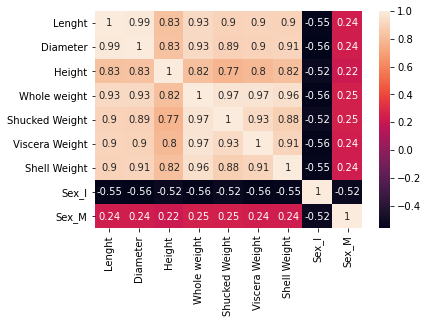

In [ ]:
sns.heatmap(X.corr(),
            annot = True)

# PCA prep

## standardization

In [ ]:
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X))
X_scaled.head(2)

,0,1,2,3,4,5,6,7,8
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,0.0,1.0
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,0.0,1.0


## determine optimal number of components

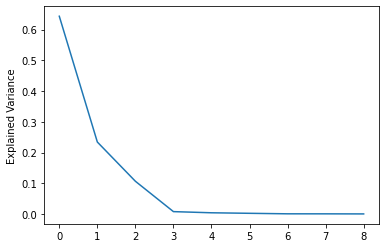

In [ ]:
model = PCA(random_state=1502).fit(X_scaled)
plt.plot(model.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.show()

# PCA

In [ ]:
model = PCA(n_components=3,
            random_state = 1502).fit(X_scaled)

## Interpretation

In [ ]:
interpretation = pd.DataFrame(model.components_,
                              columns = X.columns)
interpretation

,Lenght,Diameter,Height,Whole weight,Shucked Weight,Viscera Weight,Shell Weight,Sex_I,Sex_M
0,0.162097,0.168853,0.033600,0.177639,0.146710,0.145040,0.137066,-0.673094,0.630973
1,0.254843,0.262763,0.051207,0.271986,0.221049,0.223921,0.213838,-0.340180,-0.727296
2,0.294654,0.293744,0.052035,0.329658,0.292162,0.257841,0.245421,0.656281,0.269694


# Manifold Learning

# t-SNE

In [ ]:
model = TSNE(n_components = 2,
             random_state = 1502)
components = model.fit_transform(X)

# Plotting

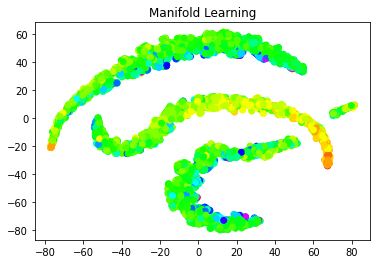

In [ ]:
plt.scatter(components[:,0],
            components[:,1],
            cmap = "hsv",
            c = data["Rings (+1.5=Years)"])
plt.title("Manifold Learning")
plt.show()